In [65]:
python_material_folder_name = "python-material"

In [66]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Check if in Google Colab environment
try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True
except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."

In [67]:
# Read in the dataset
df = pd.read_csv(f"{path_python_material}/data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

## 1. Data Preparation And Cleaning

In [68]:
#Dropping columns that do not add to the dataset

to_drop=['Unnamed: 0.1', 'Unnamed: 0']
df_dropped = df.drop(to_drop, axis = 1)

In [69]:
df_dropped.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,Not Verified,Jan-2015,Fully Paid,n,https:/

In [70]:
#drop duplicates
df_dropped.drop_duplicates(inplace = True)

In [71]:
df_dropped.shape

(100000, 141)

In [72]:
#check for missing values and find columns with missing values
#find number of missing values per column

nan_count = df_dropped.isna().sum()

print(nan_count)


id                                                0
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      8954
emp_length                                     6950
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                               0
purpose                                           0
title       

#### Based on the size of the dataset, variables with large numbers of missing data will be droped

In [73]:
#drop columns with missing values from 80000 and above

df_dropped = df_dropped.dropna(axis = 'columns',thresh = 80000)

In [74]:
df_dropped.shape

(100000, 92)

In [75]:
df_dropped.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,May-2020,669.0,665.0,1.0,1.0,Individual,0.0,3832.0,259024.0,2400.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,16.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,N,N
1,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,May-2020,704.0,700.0,0.0,1.0,Individual,0.0,0.0,61815.0,35200.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,24.0,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,N,N
2,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,Not Verified,Jan-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,347xx,FL,7.22,0.0,Apr-2010,665.0,669.0,0.0,7.0,1.0,6001.0,52.6%,9.0,f,0.00,0.00,5846.672836,5846.67,5000.00,846.67,0.0,0.0,0.0,Jan-2018,162.43,May-2020,789.0,785.0,0.0,1.0,Individual,0.0,0.0,159131.0,11400.0,4.0,22733.0,4521.0,54.8,0.0,0.0,57.0,57.0,14.0,9.0,1.0,14.0,1.0,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,1.0,171118.0,13124.0,10000.0,7526.0,N,N
3,134798709,24000.0,24000.0,24000.0,60 months,11.05%,522.42,B,B4,NaN,NaN,MORTGAGE,43500.0,Not Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,443xx,OH,24.55,0.0,Oct-2005,750.0,754.0,0.0,15.0,0.0,6573.0,12.1%,23.0,w,16317.69,16317.69,12000.930000,12000.93,7682.31,4318.62,0.0,0.0,0.0,May-2020,522.42,May-2020,749.0,745.0,0.0,1.0,Individual,0.0,0.0,104590.0,54500.0,4.0,6973.0,43140.0,12.0,0.0,0.0,37.0,132.0,1.0,1.0,2.0,1.0,3.0,1.0,6.0,7.0,11.0,16.0,2.0,13.0,19.0,7.0,15.0,0.0,0.0,0.0,2.0,95.7,0.0,0.0,0.0,202606.0,18520.0,49000.0,20000.0,N,N
4,127097355,14000.0,14000.0,14000.0,60 months,13.59%,322.79,C,C2,Shipping Clerk,10+ years,MORTGAGE,48000.0,Source Verified,Jan-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,681xx,NE,24.30,0.0,Apr-2008,735.0,739.0,1.0

In [76]:
nan_count = df_dropped.isna().sum()

print(nan_count)

id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      8954
emp_length                     6950
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                           780
zip_code                          0
addr_state                        0
dti                             102
delinq_2yrs                       0
earliest_cr_line                  0
fico_range_low                    0
fico_range_high                   0
inq_last_6mths              

In [77]:
#we now check for the descriptions of the various datatypes
# Descriptive statistics of the numeric columns
print("\nDescriptive Statistics:")
df_dropped.describe().apply(lambda x: x.apply('{0:.2f}'.format))


Descriptive Statistics:


,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,99898.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,99994.00,100000.00,100000.00,97562.00,97562.00,97562.00,98222.00,97560.00,97152.00,97101.00,99994.00,100000.00,94627.00,97562.00,97562.00,97562.00,98222.00,97212.00,87190.00,97562.00,97562.00,97562.00,97949.00,97562.00,97562.00,97562.00,97562.00,97562.00,97949.00,94488.00,97562.00,97562.00,97562.00,97558.00,97133.00,99955.00,99995.00,97562.00,98222.00,98222.00,97562.00
mean,97894846.43,15332.37,15328.22,15313.24,451.71,80029.18,19.33,0.28,700.64,704.64,0.55,11.69,0.18,16893.49,24.04,4032.02,4031.44,12559.49,12544.53,9911.41,2479.31,1.75,167.02,28.61,3512.91,690.48,677.66,0.02,1.00,0.00,208.06,145926.39,36397.94,4.51,13757.23,12779.26,55.84,0.01,10.71,125.75,179.95,14.46,8.33,1.51,25.10,7.09,0.48,3.70,5.59,4.86,7.64,8.56,8.27,13.79,5.55,11.70,0.00,0.00,0.08,2.08,94.36,40.05,0.12,0.04,183847.54,52791.50,24834.48,45613.08
std,51147363.88,9468.19,9467.42,9470.92,273.02,87224.34,17.28,0.82,33.80,33.80,0.86,5.75,0.55,22398.29,12.06,7465.24,7464.71,10337.36,10333.63,8669.89,2766.02,13.42,808.29,143.59,6189.95,74.90,115.21,0.14,0.00,0.06,1680.48,164456.91,35823.65,3.17,16693.22,18099.39,28.84,0.10,694.93,54.48,98.40,17.99,9.27,1.87,32.51,5.97,1.35,2.38,3.41,3.12,4.69,7.43,4.79,8.04,3.34,5.76,0.02,0.05,0.46,1.84,8.93,36.07,0.35,0.37,184093.24,51729.36,24487.59,46935.62
min,56413.00,700.00,700.00,0.00,22.51,0.00,-1.00,0.00,640.00,644.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-753.18,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,59070843.25,8000.00,8000.00,8000.00,253.06,47160.50,12.06,0.00,675.00,679.00,0.00,8.00,0.00,5973.75,15.00,0.00,0.00,4744.56,4732.01,3113.81,724.00,0.00,0.00,0.00,264.60,654.00,650.00,0.00,1.00,0.00,0.00,29722.25,15400.00,2.00,3128.00,2000.00,32.70,0.00,0.00,93.00,112.00,4.00,3.00,0.00,6.00,2.00,0.00,2.00,3.00,3.00,4.00,3.00,5.00,8.00,3.00,8.00,0.00,0.00,0.00,1.00,91.70,0.00,0.00,0.00,52912.50,21366.00,8900.00,15550.25
50%,107808290.50,13000.00,13000.00,13000.00,380.81,66000.00,18.10,0.00,695.00,699.00,0.00,11.00,0.00,11465.00,22.00,0.00,0.00,9767.65,9751.74,7415.48,1537.72,0.00,0.00,0.00,584.09,704.00,700.00,0.00,1.00,0.00,0.00,80931.50,26800.00,4.00,7461.50,6262.50,57.30,0.00,0.00,130.00,162.00,9.00,6.00,1.00,14.00,6.00,0.00,3.00,5.00,4.00,7.00,7.00,7.00,12.00,5.00,11.00,0.00,0.00,0.00,2.00,100.00,33.30,0.00,0.00,118273.50,38952.00,17500.00,34083.00
75%,143359217.75,20000.00,20000.00,20000.00,602.30,95000.00,24.87,0.00,720.00,724.00,1.00,15.00,0.00,20566.25,31.00,5315.21,5314.93,17567.37,17540.21,14500.00,3175.68,0.00,0.00,0.00,3979.38,7

In [78]:
categorical_colunmns = df_dropped.select_dtypes(include=['object']).columns

print("\nNumber of unique values in each column:")
df_dropped[categorical_colunmns].nunique()


Number of unique values in each column:


term                         2
int_rate                   584
grade                        7
sub_grade                   35
emp_title                40094
emp_length                  11
home_ownership               6
verification_status          3
issue_d                    159
loan_status                 10
pymnt_plan                   1
url                     100000
purpose                     14
title                     3455
zip_code                   878
addr_state                  51
earliest_cr_line           667
revol_util                1088
initial_list_status          2
last_pymnt_d               147
last_credit_pull_d         137
application_type             2
hardship_flag                2
debt_settlement_flag         2
dtype: int64

### Cleaning and preprocessing string data

In [79]:
df_dropped['int_rate_processed'] = df_dropped['int_rate'].str.rstrip('%').astype('float')

In [80]:
df_dropped['term_numeric'] = df_dropped['term'].str.strip(" months").astype('int')


In [81]:
#drop the other columns for easy manipulation

cols_to_drop = ['int_rate','term']
df_dropped = df_dropped.drop(cols_to_drop, axis = 1)

In [82]:
df_dropped.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,int_rate_processed,term_numeric
0,167338079,4000.0,4000.0,4000.0,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,May-2020,669.0,665.0,1.0,1.0,Individual,0.0,3832.0,259024.0,2400.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,16.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,N,N,13.08,36
1,71016917,24000.0,24000.0,24000.0,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,May-2020,704.0,700.0,0.0,1.0,Individual,0.0,0.0,61815.0,35200.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,24.0,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,N,N,9.16,60
2,39589826,5000.0,5000.0,5000.0,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,Not Verified,Jan-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,347xx,FL,7.22,0.0,Apr-2010,665.0,669.0,0.0,7.0,1.0,6001.0,52.6%,9.0,f,0.00,0.00,5846.672836,5846.67,5000.00,846.67,0.0,0.0,0.0,Jan-2018,162.43,May-2020,789.0,785.0,0.0,1.0,Individual,0.0,0.0,159131.0,11400.0,4.0,22733.0,4521.0,54.8,0.0,0.0,57.0,57.0,14.0,9.0,1.0,14.0,1.0,0.0,3.0,5.0,3.0,3.0,2.0,5.0,6.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,33.3,0.0,1.0,171118.0,13124.0,10000.0,7526.0,N,N,10.49,36
3,134798709,24000.0,24000.0,24000.0,522.42,B,B4,NaN,NaN,MORTGAGE,43500.0,Not Verified,Jun-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,443xx,OH,24.55,0.0,Oct-2005,750.0,754.0,0.0,15.0,0.0,6573.0,12.1%,23.0,w,16317.69,16317.69,12000.930000,12000.93,7682.31,4318.62,0.0,0.0,0.0,May-2020,522.42,May-2020,749.0,745.0,0.0,1.0,Individual,0.0,0.0,104590.0,54500.0,4.0,6973.0,43140.0,12.0,0.0,0.0,37.0,132.0,1.0,1.0,2.0,1.0,3.0,1.0,6.0,7.0,11.0,16.0,2.0,13.0,19.0,7.0,15.0,0.0,0.0,0.0,2.0,95.7,0.0,0.0,0.0,202606.0,18520.0,49000.0,20000.0,N,N,11.05,60
4,127097355,14000.0,14000.0,14000.0,322.79,C,C2,Shipping Clerk,10+ years,MORTGAGE,48000.0,Source Verified,Jan-2018,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,681xx,NE,24.30,0.0,Apr-2008,735.0,739.0,1.0,16.0,0.0,11894.0,27.1%,23.0,w,

In [83]:
df = df_dropped #renamed for ease of management

## 2 Exploratory Data Analysis

In [84]:
#To understand the key variables that affect loan approval

#we conduct some summary statistics to check how skewed the dataset is:

from scipy.stats import skew

# Calculating Summary Statistics
mean_loan = df['loan_amnt'].mean()
median_loan = df['loan_amnt'].median()
mode_loan = df['loan_amnt'].mode()[0]
std_loan = df['loan_amnt'].std()
percentiles_loan = df['loan_amnt'].quantile([0.25, 0.5, 0.75])
skewness_value = skew(df['loan_amnt'])

print(f"Mean Loan Amount: {mean_loan}")
print(f"Median Loan Amount: {median_loan}")
print(f"Mode Loan Amount: {mode_loan}")
print(f"Standard Deviation of Loan Amount: {std_loan}")
print(f"Loan Amount Percentiles: \n{percentiles_loan}")
print("Skewness:", skewness_value)


Mean Loan Amount: 15332.373
Median Loan Amount: 13000.0
Mode Loan Amount: 10000.0
Standard Deviation of Loan Amount: 9468.189883376823
Loan Amount Percentiles: 
0.25     8000.0
0.50    13000.0
0.75    20000.0
Name: loan_amnt, dtype: float64
Skewness: 0.7887250378394999


#### We can see that the data is very right-skewed based on the fact that the skewness value is positive

#### To correct this skewness, we use log transformation



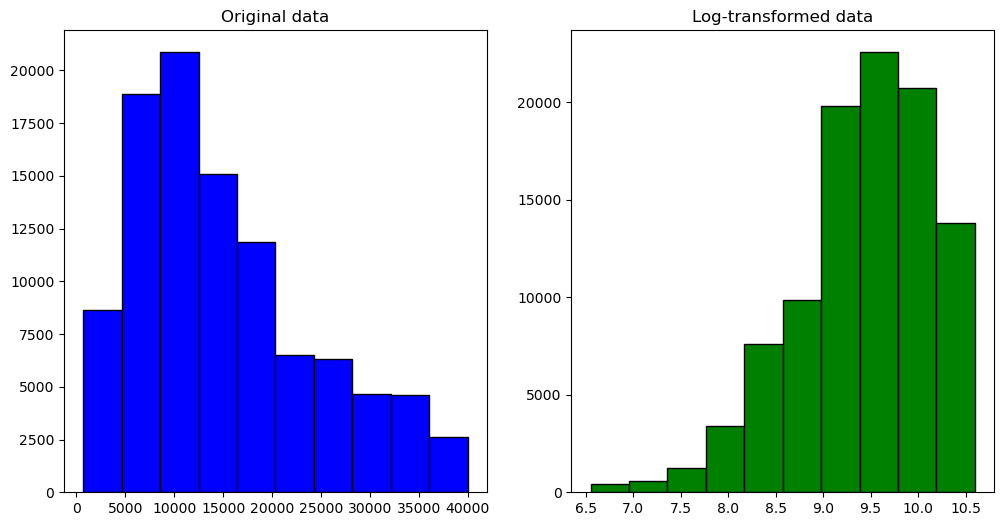

Skewness before log transform: 0.7887250378394999
Skewness after log transform: -0.6505299680118821


In [85]:
import matplotlib.pyplot as plt

# Log transformation
df['loan_amnt_log'] = np.log(df['loan_amnt'] + 1) # Adding +1 to avoid log(0)

# Plotting original and log-transformed data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['loan_amnt'], bins=10, color='blue', edgecolor='black')
plt.title('Original data')

plt.subplot(1, 2, 2)
plt.hist(df['loan_amnt_log'], bins=10, color='green', edgecolor='black')
plt.title('Log-transformed data')

plt.show()

print(f"Skewness before log transform: {skew(df['loan_amnt'])}")
print(f"Skewness after log transform: {skew(df['loan_amnt_log'])}")

### Using visualisation to check the relationships between the target and independent variables

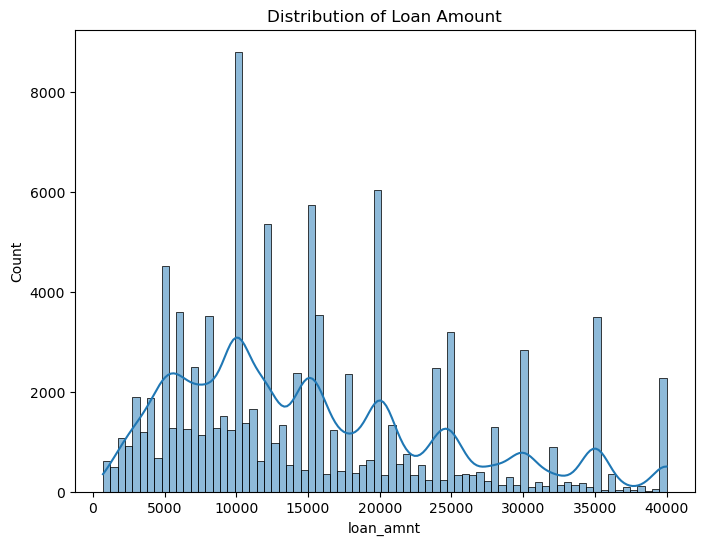

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Loan Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['loan_amnt'], kde=True,)
plt.title('Distribution of Loan Amount')
plt.show()

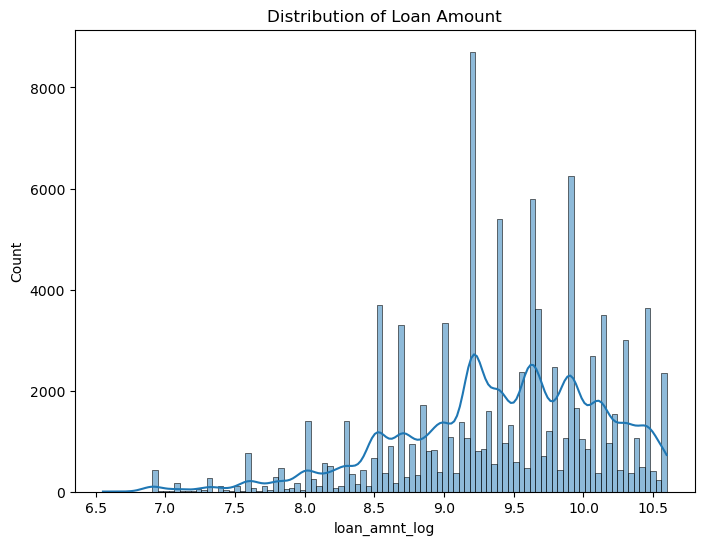

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Loan Amount
plt.figure(figsize=(8, 6))
sns.histplot(df['loan_amnt_log'], kde=True,)
plt.title('Distribution of Loan Amount')
plt.show()

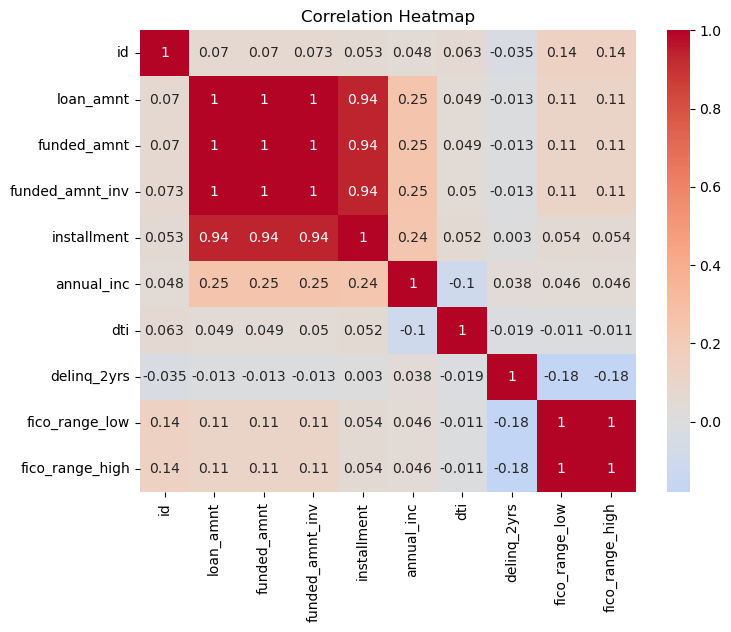

In [88]:
df_numeric = df.select_dtypes(exclude="object")

plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric \
            .drop(columns=df_numeric.columns[10:]) \
            .corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

#### From our plot, we can see that loan_amnt is strongly correlated with installment, funded_amnt,funded_amnt_inv

In [89]:
df_numeric.corr().head(10)

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,int_rate_processed,term_numeric,loan_amnt_log
id,1.000000,0.069585,0.070426,0.072644,0.053122,0.048110,0.063316,-0.034642,0.136056,0.136056,-0.133213,0.021417,-0.053769,0.014232,-0.071945,0.544619,0.544578,-0.352441,-0.350387,-0.339494,-0.225023,-0.018769,-0.095589,-0.083260,-0.143228,0.162942,0.137961,0.010252,NaN,-0.034081,-0.009590,0.033323,0.105515,-0.002395,0.020468,0.170281,-0.208100,-0.003450,-0.006454,-0.015531,-0.045247,0.051984,0.019530,-0.092087,0.009149,0.036017,-0.000712,0.001238,-0.042931,0.041326,-0.114559,0.010253,-0.004339,-0.108981,-0.042993,0.008497,-0.014395,-0.032610,-0.021964,-0.002420,0.016120,-0.200527,-0.006617,-0.045211,0.057603,0.059995,0.135620,0.079815,-0.044850,0.024468,0.034738
loan_amnt,0.069585,1.000000,0.999829,0.999297,0.943736,0.249457,0.049319,-0.012540,0.114610,0.114609,-0.035071,0.174131,-0.058210,0.332163,0.185355,0.449608,0.449634,0.670850,0.670918,0.602905,0.580429,0.073851,0.125247,0.122159,0.321460,0.091484,0.074173,-0.022780,NaN,-0.003170,-0.027866,0.302120,0.351375,-0.010377,0.223601,0.210893,0.050059,-0.010581,-0.000794,0.121312,0.163270,0.054319,0.033921,0.212047,0.037632,0.000697,-0.062144,0.189939,0.147701,0.207458,0.183298,0.079591,0.153224,0.147777,0.147874,0.172722,-0.000485,-0.002693,-0.027142,-0.033423,0.096753,0.021491,-0.075838,0.000663,0.332667,0.274361,0.371336,0.208203,0.066353,0.390571,0.921521
funded_amnt,0.070426,0.999829,1.000000,0.999510,0.943976,0.249441,0.049476,-0.012548,0.114344,0.114342,-0.035289,0.174230,-0.058155,0.332109,0.185295,0.449882,0.449908,0.670821,0.670931,0.602890,0.580347,0.073888,0.125321,0.122238,0.321465,0.091455,0.074146,-0.022728,NaN,-0.003147,-0.027866,0.302120,0.351375,-0.010377,0.223601,0.210893,0.050059,-0.010547,-0.000788,0.121312,0.163271,0.054320,0.033921,0.212047,0.037632,0.000697,-0.062144,0.189939,0.147701,0.207458,0.183298,0.079591,0.153224,0.147777,0.147874,0.172721,-0.000485,-0.002693,-0.027142,-0.033423,0.096753,0.021491,-0.075787,0.000707,0.332667,0.274361,0.371336,0.208203,0.066387,0.390276,0.921318
funded_amnt_inv,0.072644,0.999297,0.999510,1.000000,0.943319,0.249238,0.049864,-0.012629,0.114245,0.114243,-0.036569,0.174460,-0.057911,0.331812,0.185249,0.450435,0.450465,0.670087,0.671050,0.602135,0.580028,0.073870,0.125126,0.122154,0.321206,0.091624,0.074294,-0.022594,NaN,-0.003100,-0.027882,0.302125,0.351395,-0.010393,0.223618,0.210934,0.049992,-0.010461,-0.000780,0.121314,0.163268,0.054337,0.033934,0.212038,0.037651,0.000721,-0.062148,0.189920,0.147665,0.207450,0.183262,0.079591,0.153210,0.147751,0.147840,0.172699,-0.000490,-0.002705,-0.027147,-0.033448,0.096774,0.021429,-0.075651,0.000803,0.332677,0.274357,0.371366,0.208195,0.066340,0.390598,0.920696
installment,0.053122,0.943736,0.943976,0.943319,1.000000,0.243555,0.051612,0.003029,0.053648,0.053648,-0.009944,0.164985,-0.046138,0.319814,0.166051,0.365841,0.365851,0.664375,0.664331,0.615898,0.515549,0.085284,0.124895,0.121595,0.307744,0.057508,0.048305,-0.017846,NaN,0.

## 3. Modelling

### Baseline Model

To assess people most likely to default on loans and which variables are most reliable in predicting this, we create a baseline model

#### The Target Variable

In [90]:
df['loan_default'] = df.loan_status == "Charged Off"
df['loan_default'].value_counts()

False    87616
True     12384
Name: loan_default, dtype: int64

In [91]:
#check the data types of the variables

df.dtypes

id                              int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc    

In [92]:
#select the features for the model

features = ['term_numeric', 'int_rate_processed', 'loan_amnt','annual_inc', 'dti','funded_amnt']
X = df[features]
y = df['loan_default']

In [93]:
#import the relevant libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Data Processing

In [94]:
# Initialize and train the Logistic Regression model
from sklearn.impute import SimpleImputer

# LogisticRegression model in scikit-learn cannot handle missing values represented as NaN (Not a Number), hence replacing
# Create an imputer (replace missing values with the mean of the column)
imputer = SimpleImputer(strategy='mean')
# What pandas method did we see previously to accomplish this?

# Fit the imputer
X = imputer.fit_transform(X)

#### Data Splitting


In [95]:
# Split the data into training and testing sets (returns pandas dfs)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
for dframe in [X_train, X_test, y_train, y_test]:
    print(f"Shape: {dframe.shape}")

Shape: (70000, 6)
Shape: (30000, 6)
Shape: (70000,)
Shape: (30000,)


#### Model Selection

In [97]:
model = LogisticRegression() 

#### Model Training

In [98]:
model.fit(X_train, y_train)

LogisticRegression()

### Model Evaluation 

#### Generating predictions

In [99]:
# Predict on the test set
predictions = model.predict(X_test)
predictions

array([False, False, False, ..., False, False, False])

#### Confusion Matrix

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
print(f'Confusion Matrix:\n{cm}')

Accuracy: 0.8802666666666666
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.5139164588884113
Confusion Matrix:
[[26408     0]
 [ 3592     0]]


C:\Users\rosel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Based on the results of this evaluation, we can see that the model is not good we work on the Challenger model

### Challenger Model

In [101]:
#Selecting the features to build the model 

features = ['term_numeric', 'int_rate_processed', 'loan_amnt','annual_inc', 'dti','funded_amnt','delinq_2yrs','recoveries']

X = df[features]
y = df['loan_default']

print(f"Number of features: {len(features)}")

Number of features: 8


In [102]:
X.head()

,term_numeric,int_rate_processed,loan_amnt,annual_inc,dti,funded_amnt,delinq_2yrs,recoveries
0,36,13.08,4000.0,48000.0,20.25,4000.0,1.0,0.0
1,60,9.16,24000.0,57000.0,25.33,24000.0,0.0,0.0
2,36,10.49,5000.0,55000.0,7.22,5000.0,0.0,0.0
3,60,11.05,24000.0,43500.0,24.55,24000.0,0.0,0.0
4,60,13.59,14000.0,48000.0,24.30,14000.0,0.0,0.0


### Normalization of the dataset

In [103]:
import numpy as np

In [104]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling (alternative: StandardScaler for z-score normalization)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with same column names
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.head()

,term_numeric,int_rate_processed,loan_amnt,annual_inc,dti,funded_amnt,delinq_2yrs,recoveries
0,0.0,0.302570,0.083969,0.004364,0.02125,0.083969,0.055556,0.0
1,1.0,0.149922,0.592875,0.005182,0.02633,0.592875,0.000000,0.0
2,0.0,0.201713,0.109415,0.005000,0.00822,0.109415,0.000000,0.0
3,1.0,0.223520,0.592875,0.003955,0.02555,0.592875,0.000000,0.0
4,1.0,0.322430,0.338422,0.004364,0.02530,0.338422,0.000000,0.0


### Building the neural network

In [105]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (returns pandas dfs)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model (empty intiially)
model2 = Sequential()

# Adding layers to our model, which are like different parts of the brain.
# Each layer has "neurons" (like tiny decision-makers):

# Add the first part of our brain that looks at the data
model2.add(Dense(16, input_dim=X_scaled_df.shape[1], activation='relu'))

# smaller brain part that processes what the first layer has figured out.
model2.add(Dense(8, activation='relu'))

#This is like the brain's decision-making part, where it makes a yes/no decision (like "Will this person pay back their loan?").
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(
    optimizer='adam', # like the brain’s coach, guiding it to get better and better at its task
    loss='binary_crossentropy', # how the brain measures its mistakes,  for optimisation
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
    )

C:\Users\rosel\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

#### Training the model

In [108]:
#Training the model
history = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - AUC: 0.4967 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8771 - loss: 0.4344 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8724 - val_loss: 0.3819
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - AUC: 0.4954 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8773 - loss: 0.3724 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8724 - val_loss: 0.3819
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - AUC: 0.5027 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8749 - loss: 0.3770 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8724 - val_loss: 0.3825
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - AUC: 0.4950 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8786 - loss: 0.3699 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e

#### Making Predictions

In [109]:
# Make predictions

y_prob = model2.predict(X_test)
y_pred = (y_prob > 0.5)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [110]:
from dsif6utility import model_evaluation_report
model_evaluation_report(X_test, y_test, y_pred, y_prob)

Accuracy: 0.87835
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.5
Confusion Matrix:
[[17567     0]
 [ 2433     0]]


C:\Users\rosel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Exploring Early stopping to improve perfomance

In [112]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_precision',  # Watch the validation loss
    patience=10,  # Stop if no improvement after 5 epochs
    restore_best_weights=True,  # Restore the model weights at the best epoch
    mode='min'
)

# Train with early stopping
history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - AUC: 0.4963 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8777 - loss: 0.3716 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8784 - val_loss: 0.3706
Epoch 2/20
  87/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - AUC: 0.5018 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8748 - loss: 0.3768

C:\Users\rosel\anaconda3\lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_precision` which is not available. Available metrics are: AUC,Precision,Recall,accuracy,loss,val_AUC,val_Precision,val_Recall,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - AUC: 0.4981 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8768 - loss: 0.3734 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8784 - val_loss: 0.3704
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - AUC: 0.4911 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8765 - loss: 0.3741 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8784 - val_loss: 0.3704
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - AUC: 0.5009 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8751 - loss: 0.3767 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8784 - val_loss: 0.3702
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - AUC: 0.4980 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8762 - loss: 0.3745 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accur

In [113]:
# Make predictions

y_prob = model2.predict(X_test)
y_pred = (y_prob > 0.5)

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step


In [114]:
from dsif6utility import model_evaluation_report
model_evaluation_report(X_test, y_test, y_pred, y_prob)

Accuracy: 0.87835
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.5
Confusion Matrix:
[[17567     0]
 [ 2433     0]]


C:\Users\rosel\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### There does not appear to be any improvement in the model performance.